# Real Estate Data Analysis

This notebook demonstrates data analysis steps for real estate data collected from Immoweb.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Set visualization style
sns.set_style("whitegrid")


In [2]:
# Load the data
# Replace 'your_cleaned_data.csv' with the path to your dataset
data = pd.read_csv("immoweb_data_cleaned.csv")

# Preview the data
print(data.head())



    Price  Locality Type_of_Property Subtype_of_Property  \
0  685000      1180        APARTMENT           PENTHOUSE   
1  289000      8680        APARTMENT           APARTMENT   
2  259000      5030            HOUSE               HOUSE   
3  429210      9052        APARTMENT           APARTMENT   
4  314000      1770        APARTMENT           APARTMENT   

  State_of_the_Building  Number_of_Rooms  Living_Area  Fully_Equipped_Kitchen  \
0        JUST_RENOVATED                2        127.0                       0   
1        JUST_RENOVATED                3        120.0                       0   
2                  GOOD                3        154.0                       0   
3                  GOOD                2        100.0                       1   
4                  GOOD                2         96.0                       1   

   Terrace  Garden  Surface_area_plot_of_land  Number_of_Facades  \
0      1.0     0.0                        0.0                4.0   
1      1.0     0

In [38]:
print(data.info())
#print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16631 entries, 0 to 16630
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      16631 non-null  int64  
 1   Locality                   16631 non-null  int64  
 2   Type_of_Property           16631 non-null  object 
 3   Subtype_of_Property        16631 non-null  object 
 4   State_of_the_Building      16631 non-null  object 
 5   Number_of_Rooms            16631 non-null  int64  
 6   Living_Area                16631 non-null  float64
 7   Fully_Equipped_Kitchen     16631 non-null  int64  
 8   Terrace                    16631 non-null  float64
 9   Garden                     16631 non-null  float64
 10  Surface_area_plot_of_land  16631 non-null  float64
 11  Number_of_Facades          16631 non-null  float64
 12  Swimming_Pool              16631 non-null  float64
 13  Lift                       16631 non-null  flo

In [4]:
# Descriptive Statistics
# Summary statistics for numeric variables
print(data.describe())

# Value counts for categorical variables
if 'Locality' in data.columns:
    print(data['Locality'].value_counts())


               Price      Locality  Number_of_Rooms   Living_Area  \
count   16633.000000  16633.000000     16633.000000  16633.000000   
mean   330671.358624   5106.949919         2.440390    123.383094   
std    150273.187289   3259.474938         0.883659     51.283972   
min      5000.000000   1000.000000         1.000000     12.000000   
25%    225000.000000   2018.000000         2.000000     85.000000   
50%    299000.000000   4122.000000         2.000000    113.000000   
75%    399000.000000   8540.000000         3.000000    155.000000   
max    880000.000000   9991.000000         4.000000    294.000000   

       Fully_Equipped_Kitchen       Terrace        Garden  \
count            16633.000000  16633.000000  16633.000000   
mean                 0.182649      0.686346      0.197619   
std                  0.386390      0.463991      0.398215   
min                  0.000000      0.000000      0.000000   
25%                  0.000000      0.000000      0.000000   
50%         

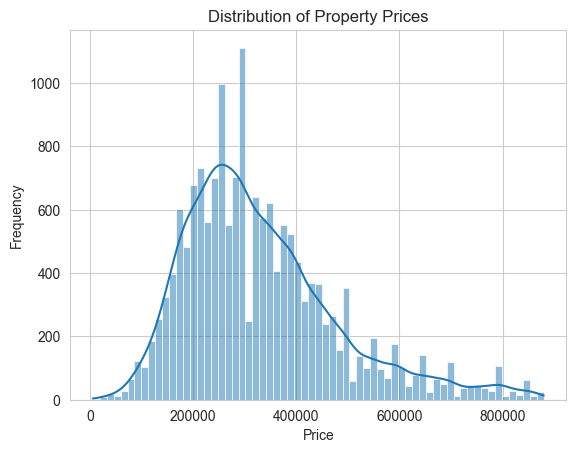

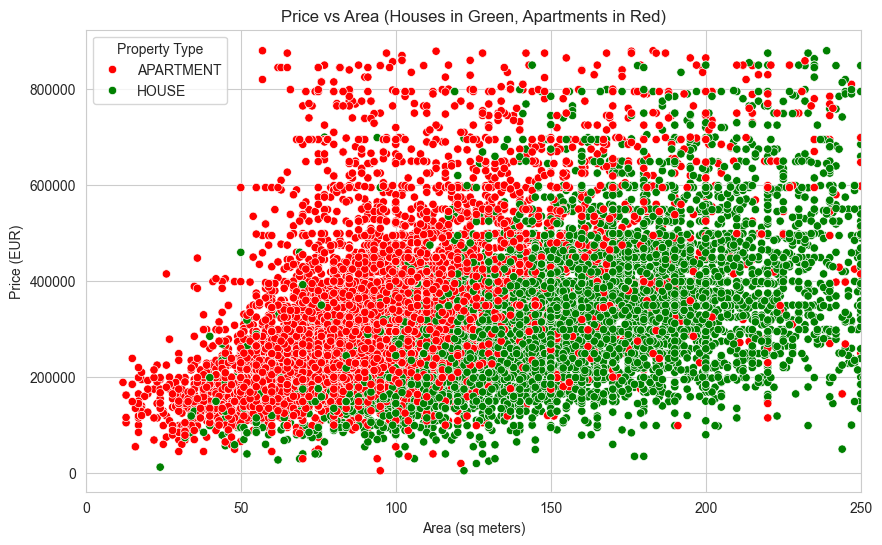

In [7]:
# Visualize the distribution of property prices
data = pd.read_csv("immoweb_data_cleaned.csv")
sns.histplot(data['Price'], kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Example: Assume `Property_Type` column categorizes properties as 'House' or 'Apartment'
if 'Living_Area' in data.columns and 'Type_of_Property' in data.columns:
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    sns.scatterplot(
        x='Living_Area', 
        y='Price', 
        data=data, 
        hue='Type_of_Property',  # Use Property_Type to color the points
        palette={'HOUSE': 'green', 'APARTMENT': 'red'}  # Specify colors
    )
    plt.title("Price vs Area (Houses in Green, Apartments in Red)")
    plt.xlabel("Area (sq meters)")
    plt.ylabel("Price (EUR)")
    
    # Limit the x-axis to 2000 sq meters
    plt.xlim(0, 250)
    
    plt.legend(title="Property Type")  # Add legend with title
    plt.show()


In [8]:
print(data.dtypes)

Price                          int64
Locality                       int64
Type_of_Property              object
Subtype_of_Property           object
State_of_the_Building         object
Number_of_Rooms                int64
Living_Area                  float64
Fully_Equipped_Kitchen         int64
Terrace                      float64
Garden                       float64
Surface_area_plot_of_land    float64
Number_of_Facades            float64
Swimming_Pool                float64
Lift                         float64
Municipality                  object
Province                      object
dtype: object



1_State Mapping for 'State_of_the_Building'
A dictionary state_mapping is created to map the building conditions to numerical values:
If the column 'State_of_the_Building' exists in the dataset, it will be mapped to these numerical values.
2-Aggregate 'Municipality' by Average Price
If the 'Municipality' column exists in the dataset, it groups the data by municipality and calculates the average price of properties in each municipality.
3_Separate Numeric and Categorical Columns
4_Encode Categorical Variables
A LabelEncoder is used to encode the categorical columns as numerical values for correlation analysis.
It transforms each category in the categorical columns to a unique integer value. The transformed data is stored in encoded_data.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, f_oneway, pointbiserialr

# Load your dataset
data = pd.read_csv("immoweb_data_cleaned.csv")

# Step 2: Remove 'Province' and 'Locality' columns
data = data.drop(columns=['Province', 'Locality'], errors='ignore')  # 'errors' ensures no error if columns don't exist

# Step 3: Apply State Mapping
state_mapping = {
    'TO_BE_DONE_UP': 0,
    'TO_RENOVATE': 1,
    'JUST_RENOVATED': 2,
    'GOOD': 3,
    'AS_NEW': 4
}

if 'State_of_the_Building' in data.columns:
    data['State_of_the_Building'] = data['State_of_the_Building'].map(state_mapping)

# Aggregating 'Locality' for meaningful analysis
if 'Municipality' in data.columns:  
    locality_agg = data.groupby('Municipality')['Price'].mean().reset_index().rename(columns={'Price': 'Average_Price'})
    print("Top Localities by Average Price:")
    print(locality_agg.sort_values(by='Average_Price', ascending=False).head())

# Step 4: Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Step 5: Encode categorical columns for correlation analysis
label_encoder = LabelEncoder()
encoded_data = data.copy()
for col in categorical_cols:
    encoded_data[col] = label_encoder.fit_transform(data[col].astype(str))

# Save the full correlation matrix to a CSV file
encoded_data.to_csv("encoded_data.csv", index=True)

# Step 6: Compute correlation matrix
correlation_matrix = encoded_data.corr()


Top Localities by Average Price:
            Municipality  Average_Price
258         Knokke-Heist  601345.178971
513      Wezembeek-Oppem  583675.000000
218            Hoeilaart  577000.000000
250           Kampenhout  549000.000000
520  Woluwe-Saint-Pierre  531124.031008
Numeric columns: Index(['Price', 'State_of_the_Building', 'Number_of_Rooms', 'Living_Area',
       'Fully_Equipped_Kitchen', 'Terrace', 'Garden',
       'Surface_area_plot_of_land', 'Number_of_Facades', 'Swimming_Pool',
       'Lift'],
      dtype='object')
Categorical columns: Index(['Type_of_Property', 'Subtype_of_Property', 'Municipality'], dtype='object')


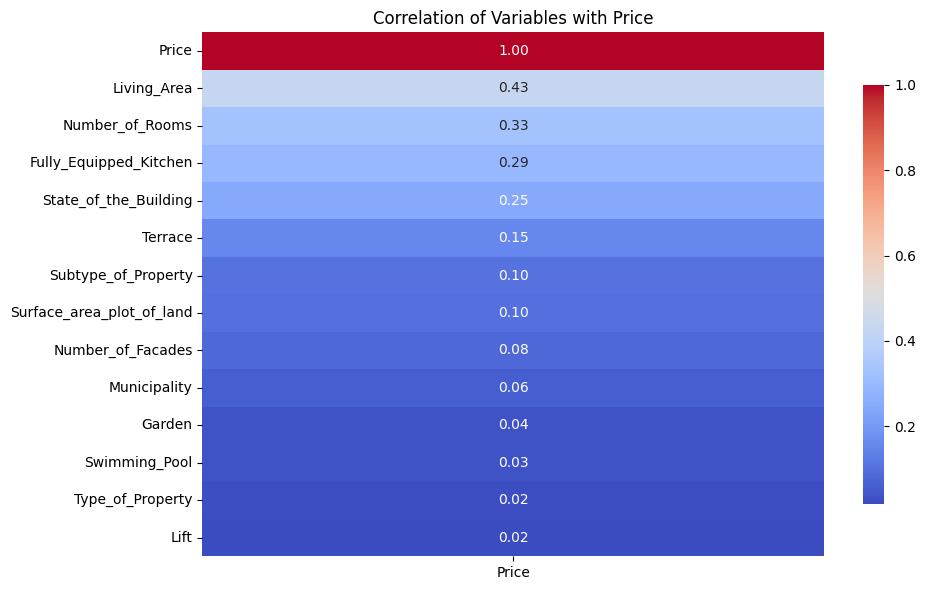

In [25]:
# Step 7: Display correlation with target variable 'Price'
if 'Price' in correlation_matrix.columns:  
    #print("\nCorrelation of all variables with 'Price':")
    #print(correlation_matrix["Price"].sort_values(ascending=False))

    # Visualization: Correlation Heatmap with Price
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        correlation_matrix["Price"].sort_values(ascending=False).to_frame(),
        annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"shrink": 0.8}
    )
    plt.title("Correlation of Variables with Price")
    plt.tight_layout()
    plt.show()

# The interpretation of the correlations provided between Price and the respective variables.
1_Strongest Influence: Living_Area (0.43), followed by Number_of_Rooms (0.33), are the most significant factors affecting the price.

2_Weakest Influence: Variables like Lift (0.02) and Type_of_Property (0.02) have almost no influence on property prices.

3_Surprisingly Weak Relationships: Features like Swimming_Pool (0.03) and Garden (0.04) show weaker-than-expected correlations, possibly due to their infrequency or overlap with other features.

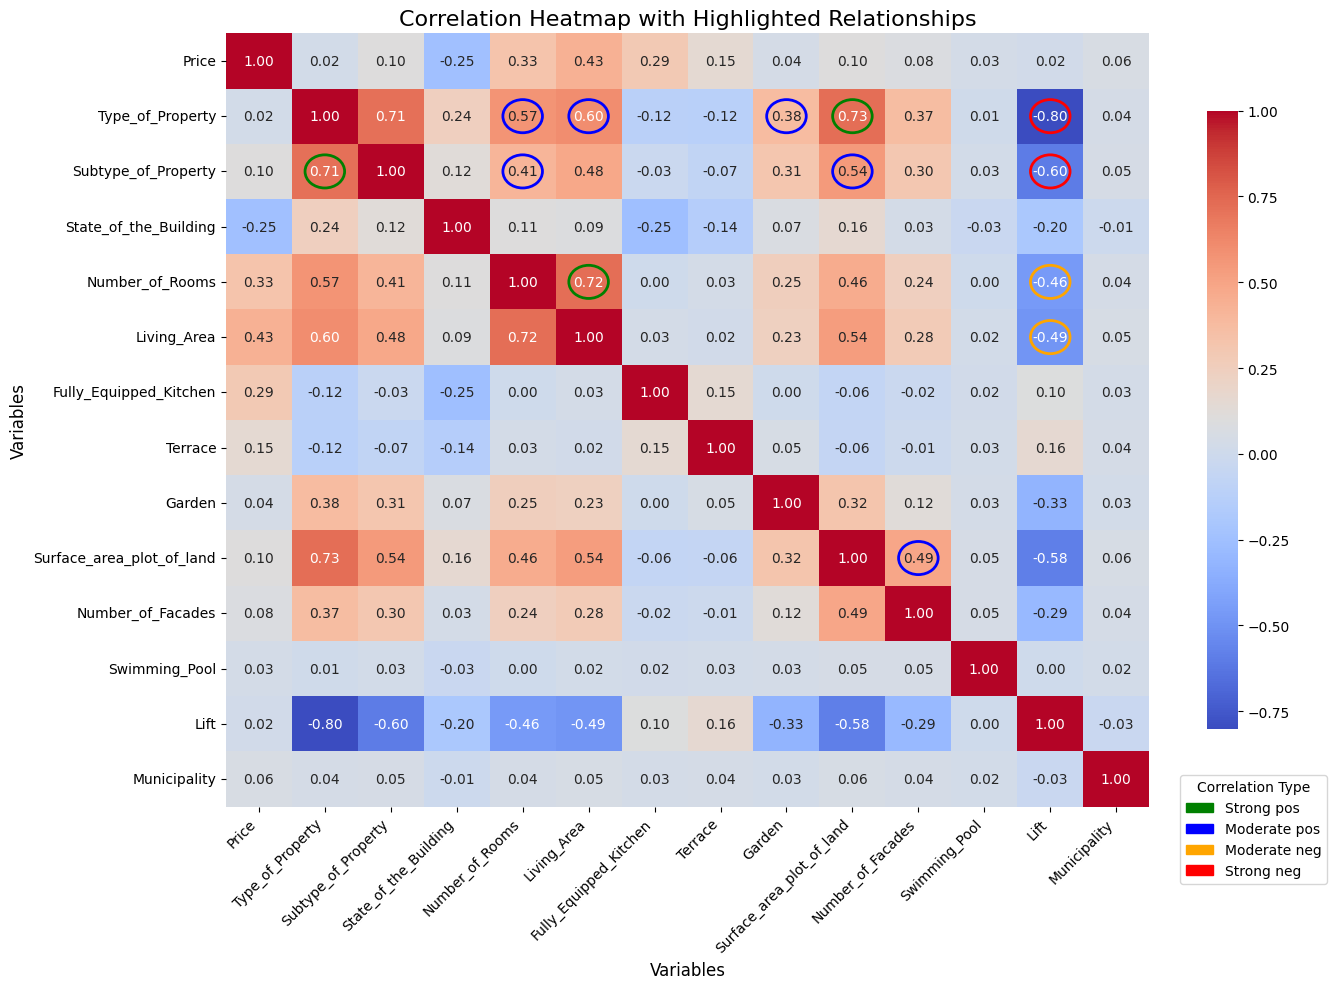

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correlations to highlight with categories and colors
highlighted_correlations = [
    ('Type_of_Property', 'Subtype_of_Property', 'strong_pos'),  # Strong positive
    ('Living_Area', 'Number_of_Rooms', 'strong_pos'),
    ('Surface_area_plot_of_land', 'Type_of_Property', 'strong_pos'),
    ('Surface_area_plot_of_land', 'Subtype_of_Property', 'moderate_pos'),  # Moderate positive
    ('Number_of_Rooms', 'Type_of_Property', 'moderate_pos'),
    ('Living_Area', 'Type_of_Property', 'moderate_pos'),
    ('Garden', 'Type_of_Property', 'moderate_pos'),
    ('Number_of_Facades', 'Surface_area_plot_of_land', 'moderate_pos'),
    ('Number_of_Rooms', 'Subtype_of_Property', 'moderate_pos'),
    ('Lift', 'Type_of_Property', 'strong_neg'),  # Strong negative
    ('Lift', 'Subtype_of_Property', 'strong_neg'),
    ('Lift', 'Living_Area', 'moderate_neg'),  # Moderate negative
    ('Lift', 'Number_of_Rooms', 'moderate_neg')
]

# Define a mapping of categories to colors
color_mapping = {
    'strong_pos': 'green',
    'moderate_pos': 'blue',
    'moderate_neg': 'orange',
    'strong_neg': 'red'
}

# Load data
data = pd.read_csv("immoweb_data_cleaned.csv")
data = data.drop(columns=['Province', 'Locality'], errors='ignore')

# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
encoded_data = data.copy()
for col in categorical_cols:
    encoded_data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Compute correlation matrix
correlation_matrix = encoded_data.corr()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"shrink": 0.8}
)

# Overlay circles on selected correlations with different colors
ax = plt.gca()  # Get the current axis
for var1, var2, category in highlighted_correlations:
    if var1 in correlation_matrix.columns and var2 in correlation_matrix.columns:
        # Get the position of the variables
        x = correlation_matrix.columns.get_loc(var1) + 0.5
        y = correlation_matrix.index.get_loc(var2) + 0.5
        # Draw a circle around the cell with the corresponding color
        circle = plt.Circle((x, y), 0.3, color=color_mapping[category], fill=False, linewidth=2)
        ax.add_artist(circle)

# Adding axes for variables
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Adding a legend for the colors
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color=color, label=category.replace('_', ' ').capitalize())
    for category, color in color_mapping.items()
]
plt.legend(
    handles=legend_patches, loc='upper right', bbox_to_anchor=(1.20, 0.05), title="Correlation Type"
)

# Title and layout
plt.title("Correlation Heatmap with Highlighted Relationships", fontsize=16)
plt.tight_layout()
plt.show()


# The interpretation of the correlations provided between variables.
1_Strong Positive Correlations (Above 0.5):
Type_of_Property ↔ Subtype_of_Property (0.71): Subtypes align strongly with property types.
Living_Area ↔ Number_of_Rooms (0.72): Larger living areas are strongly linked to more rooms.
Surface_area_plot_of_land ↔ Type_of_Property (0.73): Larger land plots correspond to specific property types.
Surface_area_plot_of_land ↔ Subtype_of_Property (0.54): Subtypes are influenced by plot size.

2_Moderate Positive Correlations (0.3 to 0.5):
Number_of_Rooms ↔ Type_of_Property (0.57): Room count correlates with property type.
Living_Area ↔ Type_of_Property (0.60): Certain property types tend to have larger living areas.
Garden ↔ Type_of_Property (0.38): Gardens are associated with specific property types.
Number_of_Facades ↔ Surface_area_plot_of_land (0.48): Larger land plots are linked to more facades.
Number_of_Rooms ↔ Subtype_of_Property (0.41): Subtypes tend to influence room numbers.

3_Weak Positive Correlations (0.1 to 0.3):
Fully_Equipped_Kitchen ↔ State_of_the_Building (0.25): Better building conditions are associated with equipped kitchens.
Terrace ↔ Fully_Equipped_Kitchen (0.15): Properties with terraces often have equipped kitchens.
Garden ↔ Subtype_of_Property (0.31): Subtypes align with garden availability.
Swimming_Pool ↔ Surface_area_plot_of_land (0.04): Pools are slightly more common with larger land plots.

4-Negligible Positive Correlations (Below 0.1):
Municipality ↔ Type_of_Property (0.04): Minimal correlation between municipalities and property types.
Lift ↔ Terrace (0.16): A weak association between lifts and terraces.

c:\Users\pc click\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\pc click\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


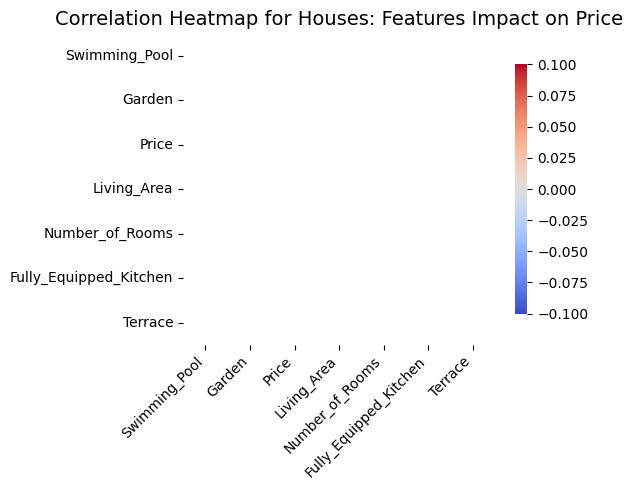

c:\Users\pc click\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\pc click\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


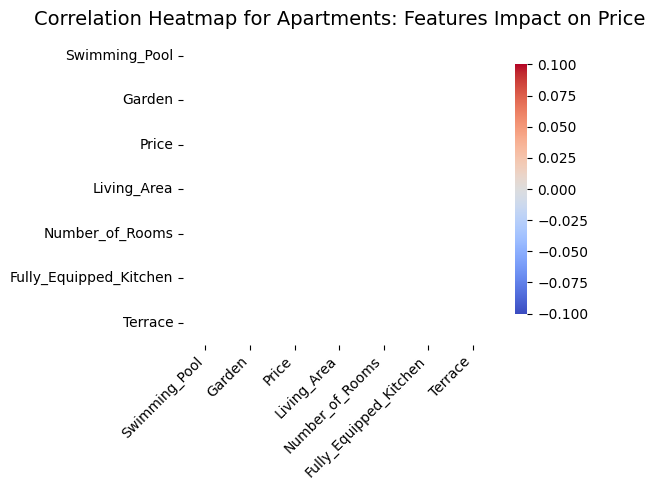

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
real_estate_data = pd.read_csv("immoweb_data_cleaned.csv")

# Ensure that the 'Type_of_Property' column exists and categorize accordingly
if 'Type_of_Property' in real_estate_data.columns:
    # Separate houses and apartments
    houses_data = real_estate_data[real_estate_data['Type_of_Property'] == 'HOUSE']
    apartments_data = real_estate_data[real_estate_data['Type_of_Property'] == 'APARTMENT']
else:
    print("Column 'Type_of_Property' not found in the dataset.")

# Encode categorical columns for both houses and apartments
categorical_columns = real_estate_data.select_dtypes(include=['object']).columns
encoded_houses_data = houses_data.copy()
encoded_apartments_data = apartments_data.copy()

for column in categorical_columns:
    encoded_houses_data[column] = LabelEncoder().fit_transform(houses_data[column].astype(str))
    encoded_apartments_data[column] = LabelEncoder().fit_transform(apartments_data[column].astype(str))

# Features of interest for correlation analysis
selected_features = ['Swimming_Pool', 'Garden', 'Price', 'Living_Area', 'Number_of_Rooms', 
                     'Fully_Equipped_Kitchen', 'Terrace']

# Compute correlation for Houses
correlation_houses_data = encoded_houses_data[selected_features].corr()

# Compute correlation for Apartments
correlation_apartments_data = encoded_apartments_data[selected_features].corr()

# Function to plot correlation heatmap
def plot_correlation(correlation_matrix, plot_title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"shrink": 0.8}
    )
    plt.title(plot_title, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot correlation heatmap for Houses
plot_correlation(correlation_houses_data, "Correlation Heatmap for Houses: Features Impact on Price")

# Plot correlation heatmap for Apartments
plot_correlation(correlation_apartments_data, "Correlation Heatmap for Apartments: Features Impact on Price")
